In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
import pandasql as psql

In [2]:
Cutoff=pd.read_csv(r"C:\Users\snith\OneDrive\Desktop\AI&ML\PROJECT\IIT-NIT Cutoff Marks.csv", header=0)
Cutoff_bk=Cutoff.copy()
Cutoff.head()

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0
3,4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0
4,5,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0


In [3]:
Cutoff.shape

(64958, 14)

In [4]:
Cutoff.duplicated().sum()

39500

In [5]:
Cutoff.drop_duplicates(inplace=True)

In [6]:
Cutoff.duplicated().sum()

0

In [7]:
del Cutoff['id']

In [8]:
Cutoff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25458 entries, 0 to 64707
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              25458 non-null  int64 
 1   institute_type    25458 non-null  object
 2   round_no          25458 non-null  int64 
 3   quota             25458 non-null  object
 4   pool              25458 non-null  object
 5   institute_short   25458 non-null  object
 6   program_name      25458 non-null  object
 7   program_duration  25458 non-null  object
 8   degree_short      25458 non-null  object
 9   category          25458 non-null  object
 10  opening_rank      25458 non-null  int64 
 11  closing_rank      25458 non-null  int64 
 12  is_preparatory    25458 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 2.7+ MB


In [9]:
Cutoff.nunique()

year                    6
institute_type          2
round_no                4
quota                   7
pool                    2
institute_short        54
program_name          130
program_duration        2
degree_short           13
category               10
opening_rank        10984
closing_rank        11940
is_preparatory          2
dtype: int64

In [10]:
Cutoff.isnull().sum()

year                0
institute_type      0
round_no            0
quota               0
pool                0
institute_short     0
program_name        0
program_duration    0
degree_short        0
category            0
opening_rank        0
closing_rank        0
is_preparatory      0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelBinarizer
LB = LabelBinarizer()
Cutoff['institute_type'] = LB.fit_transform(Cutoff['institute_type'])
Cutoff['pool'] = LB.fit_transform(Cutoff['pool'])
Cutoff['program_duration'] = LB.fit_transform(Cutoff['program_duration'])
Cutoff

,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,2016,0,6,AI,1,IIT-Bombay,Aerospace Engineering,0,B.Tech,GEN,838,1841,0
1,2016,0,6,AI,1,IIT-Bombay,Aerospace Engineering,0,B.Tech,OBC-NCL,408,1098,0
2,2016,0,6,AI,1,IIT-Bombay,Aerospace Engineering,0,B.Tech,SC,297,468,0
3,2016,0,6,AI,1,IIT-Bombay,Aerospace Engineering,0,B.Tech,ST,79,145,0
4,2016,0,6,AI,1,IIT-Bombay,Aerospace Engineering,0,B.Tech,GEN-PWD,94,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64703,2021,1,1,JK,0,NIT-Srinagar,Electronics and Communication Engineering,0,B.Tech,SC,14185,24048,0
64704,2021,1,1,JK,1,NIT-Srinagar,Electronics and Communication Engineering,0,B.Tech,ST,2736,4171,0
64705,2021,1,1,JK,0,NIT-Srinagar,Electronics and Communication Engineering,0,B.Tech,ST,10870,10870,0
64706,2021,1,1,LA,1,NIT-Srinagar,Electronics and Communication Engineering,0,B.Tech,GEN,166453,265454,0


In [12]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Cutoff['quota'] = LB.fit_transform(Cutoff['quota'])
Cutoff['institute_short'] =  LB.fit_transform(Cutoff['institute_short'])
Cutoff['program_name'] =  LB.fit_transform(Cutoff['program_name'])
Cutoff['degree_short'] =  LB.fit_transform(Cutoff['degree_short'])
Cutoff['category'] =  LB.fit_transform(Cutoff['category'])

Cutoff.head()

,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,2016,0,6,1,1,0,1,0,0,1,838,1841,0
1,2016,0,6,1,1,0,1,0,0,0,408,1098,0
2,2016,0,6,1,1,0,1,0,0,0,297,468,0
3,2016,0,6,1,1,0,1,0,0,0,79,145,0
4,2016,0,6,1,1,0,1,0,0,0,94,94,0


In [13]:
Cutoff.head()

,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,2016,0,6,1,1,0,1,0,0,1,838,1841,0
1,2016,0,6,1,1,0,1,0,0,0,408,1098,0
2,2016,0,6,1,1,0,1,0,0,0,297,468,0
3,2016,0,6,1,1,0,1,0,0,0,79,145,0
4,2016,0,6,1,1,0,1,0,0,0,94,94,0


In [14]:
Cutoff['is_preparatory'].value_counts()

0    24549
1      909
Name: is_preparatory, dtype: int64

In [15]:
is_preparatory_count = Cutoff.is_preparatory.value_counts()
print("class 0 :",is_preparatory_count[0] )
print("class 0 :",is_preparatory_count[1] )
print("proportion :", round(is_preparatory_count[0]/is_preparatory_count[1],2),":1")
print("total length:", len(Cutoff))

class 0 : 24549
class 0 : 909
proportion : 27.01 :1
total length: 25458


In [16]:
cols=['year','round_no','quota','institute_short','program_name','degree_short','category','opening_rank','closing_rank']

In [17]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in Cutoff.columns:
    if col != 'is_preparatory':
        IndepVar.append(col)

TargetVar = 'is_preparatory'

x = Cutoff[IndepVar]
y = Cutoff[TargetVar]

In [18]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.15)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(28231, 12)
(28231,)


In [19]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((19761, 12), (8470, 12), (19761,), (8470,))

In [20]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

In [21]:
Cutoff.head(10)

,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,2016,0,6,0,0,0,0,0,0,1,838,1841,0
1,2016,0,6,0,0,1,0,0,0,0,408,1098,0
2,2016,0,6,0,0,0,0,0,1,0,297,468,0
3,2016,0,6,0,0,0,0,0,0,0,79,145,0
4,2016,0,6,1,0,0,0,0,0,0,94,94,0
5,2016,0,6,0,0,0,1,0,0,0,45,45,0
6,2016,0,6,0,0,0,0,0,0,1,422,1479,0
7,2016,0,6,0,0,1,0,0,0,0,447,974,0
8,2016,0,6,0,0,0,0,0,1,0,257,572,0
9,2016,0,6,0,0,0,0,0,0,0,161,335,0


In [22]:
# Load the Results dataset

result= pd.read_csv(r"C:\Users\snith\OneDrive\Desktop\AI&ML\PROJECT\result.csv", header=0)

result.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 789  288]
 [ 313 7080]]
Outcome values : 
 789 288 313 7080
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.73      0.72      1077
           0       0.96      0.96      0.96      7393

    accuracy                           0.93      8470
   macro avg       0.84      0.85      0.84      8470
weighted avg       0.93      0.93      0.93      8470

Accuracy : 92.9 %
Precision : 71.6 %
Recall : 73.3 %
F1 Score : 0.724
Specificity or True Negative Rate : 95.8
Balanced Accuracy : 84.5 %
MCC : 0.684
roc_auc_score: 0.845


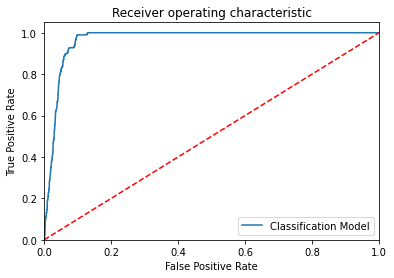

-------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 614  463]
 [ 765 6628]]
Outcome values : 
 614 463 765 6628
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.57      0.50      1077
           0       0.93      0.90      0.92      7393

    accuracy                           0.86      8470
   macro avg       0.69      0.73      0.71      8470
weighted avg       0.87      0.86      0.86      8470

Accuracy : 85.5 %
Precision : 44.5 %
Recall : 57.0 %
F1 Score : 0.5
Specificity or True Negative Rate : 89.7
Balanced Accuracy : 73.4 %
MCC : 0.421
roc_auc_score: 0.733


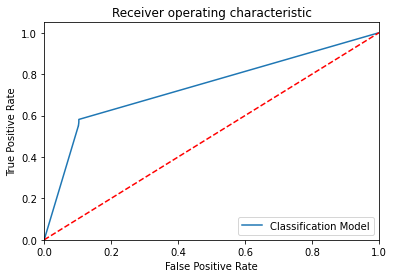

-------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 713  364]
 [ 298 7095]]
Outcome values : 
 713 364 298 7095
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.66      0.68      1077
           0       0.95      0.96      0.96      7393

    accuracy                           0.92      8470
   macro avg       0.83      0.81      0.82      8470
weighted avg       0.92      0.92      0.92      8470

Accuracy : 92.2 %
Precision : 70.5 %
Recall : 66.2 %
F1 Score : 0.683
Specificity or True Negative Rate : 96.0
Balanced Accuracy : 81.1 %
MCC : 0.639
roc_auc_score: 0.811


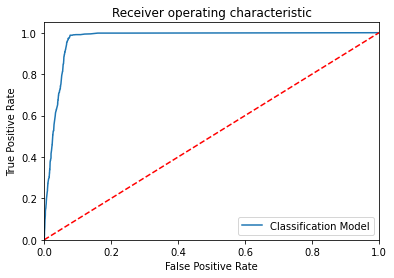

-------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 628  449]
 [ 223 7170]]
Outcome values : 
 628 449 223 7170
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.58      0.65      1077
           0       0.94      0.97      0.96      7393

    accuracy                           0.92      8470
   macro avg       0.84      0.78      0.80      8470
weighted avg       0.92      0.92      0.92      8470

Accuracy : 92.1 %
Precision : 73.8 %
Recall : 58.3 %
F1 Score : 0.651
Specificity or True Negative Rate : 97.0
Balanced Accuracy : 77.6 %
MCC : 0.613
roc_auc_score: 0.776


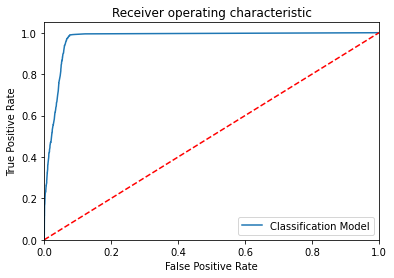

-------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 917  160]
 [ 392 7001]]
Outcome values : 
 917 160 392 7001
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.85      0.77      1077
           0       0.98      0.95      0.96      7393

    accuracy                           0.93      8470
   macro avg       0.84      0.90      0.87      8470
weighted avg       0.94      0.93      0.94      8470

Accuracy : 93.5 %
Precision : 70.1 %
Recall : 85.1 %
F1 Score : 0.769
Specificity or True Negative Rate : 94.7
Balanced Accuracy : 89.9 %
MCC : 0.736
roc_auc_score: 0.899


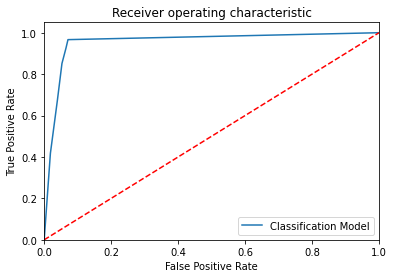

-------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[ 954  123]
 [ 443 6950]]
Outcome values : 
 954 123 443 6950
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.89      0.77      1077
           0       0.98      0.94      0.96      7393

    accuracy                           0.93      8470
   macro avg       0.83      0.91      0.87      8470
weighted avg       0.94      0.93      0.94      8470

Accuracy : 93.3 %
Precision : 68.3 %
Recall : 88.6 %
F1 Score : 0.771
Specificity or True Negative Rate : 94.0
Balanced Accuracy : 91.3 %
MCC : 0.741
roc_auc_score: 0.913


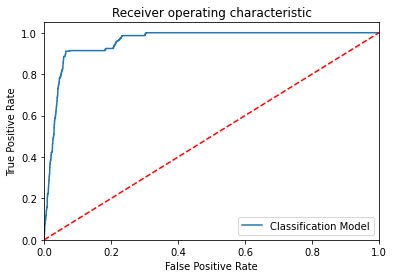

-------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier()
Confusion matrix : 
 [[ 618  459]
 [ 742 6651]]
Outcome values : 
 618 459 742 6651
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.57      0.51      1077
           0       0.94      0.90      0.92      7393

    accuracy                           0.86      8470
   macro avg       0.69      0.74      0.71      8470
weighted avg       0.87      0.86      0.87      8470

Accuracy : 85.8 %
Precision : 45.4 %
Recall : 57.4 %
F1 Score : 0.507
Specificity or True Negative Rate : 90.0
Balanced Accuracy : 73.7 %
MCC : 0.43
roc_auc_score: 0.737


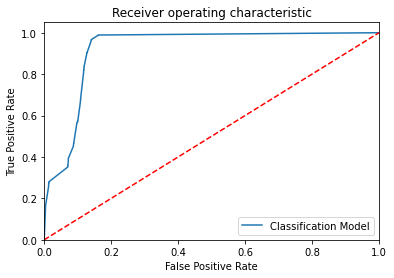

-------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[ 843  234]
 [ 403 6990]]
Outcome values : 
 843 234 403 6990
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.78      0.73      1077
           0       0.97      0.95      0.96      7393

    accuracy                           0.92      8470
   macro avg       0.82      0.86      0.84      8470
weighted avg       0.93      0.92      0.93      8470

Accuracy : 92.5 %
Precision : 67.7 %
Recall : 78.3 %
F1 Score : 0.726
Specificity or True Negative Rate : 94.5
Balanced Accuracy : 86.4 %
MCC : 0.685
roc_auc_score: 0.864


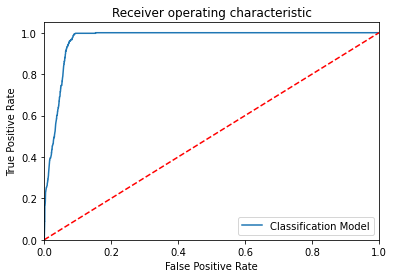

-------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 854  223]
 [ 366 7027]]
Outcome values : 
 854 223 366 7027
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.79      0.74      1077
           0       0.97      0.95      0.96      7393

    accuracy                           0.93      8470
   macro avg       0.83      0.87      0.85      8470
weighted avg       0.94      0.93      0.93      8470

Accuracy : 93.0 %
Precision : 70.0 %
Recall : 79.3 %
F1 Score : 0.744
Specificity or True Negative Rate : 95.0
Balanced Accuracy : 87.1 %
MCC : 0.705
roc_auc_score: 0.872


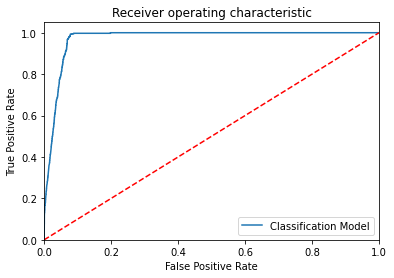

-------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[1077    0]
 [1551 5842]]
Outcome values : 
 1077 0 1551 5842
Classification report : 
               precision    recall  f1-score   support

           1       0.41      1.00      0.58      1077
           0       1.00      0.79      0.88      7393

    accuracy                           0.82      8470
   macro avg       0.70      0.90      0.73      8470
weighted avg       0.92      0.82      0.84      8470

Accuracy : 81.7 %
Precision : 41.0 %
Recall : 100.0 %
F1 Score : 0.581
Specificity or True Negative Rate : 79.0
Balanced Accuracy : 89.5 %
MCC : 0.569
roc_auc_score: 0.895


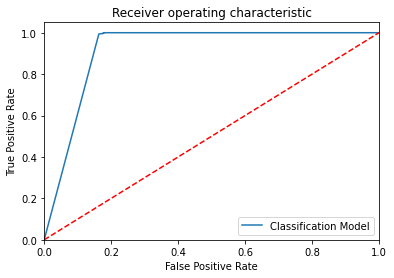

-------------------------------------------------------------------------------------------------


In [23]:
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier()
ModelGB = GradientBoostingClassifier()
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG,
ModelGB, ModelLGB, ModelGNB]
for models in MM:
    # Fit the model

    models.fit(x_train, y_train)
    # Prediction
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    # Print the model name

    print('Model Name: ', models)
    # confusion matrix in sklearn
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    # actual values
    actual = y_test
    # predicted values
    predicted = y_pred
    # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    # classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n', C_Report)
    # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    # Matthews Correlation Coefficient (MCC). Range of values of MCC liebetween -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model
    from math import sqrt
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2))
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    # Area under ROC curve
    from sklearn.metrics import roc_curve, roc_auc_score
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    # ROC Curve
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    result = result.append(new_row, ignore_index=True)

In [24]:
result.head(10)

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),789,288,313,7080,0.929,0.716,0.733,0.724,0.958,0.684,0.845127,0.845
1,DecisionTreeClassifier(),614,463,765,6628,0.855,0.445,0.57,0.5,0.897,0.421,0.733313,0.734
2,"(DecisionTreeClassifier(max_features='sqrt', r...",713,364,298,7095,0.922,0.705,0.662,0.683,0.96,0.639,0.810858,0.811
3,"(ExtraTreeClassifier(random_state=972060675), ...",628,449,223,7170,0.921,0.738,0.583,0.651,0.97,0.613,0.776469,0.776
4,KNeighborsClassifier(),917,160,392,7001,0.935,0.701,0.851,0.769,0.947,0.736,0.899208,0.899
5,SVC(probability=True),954,123,443,6950,0.933,0.683,0.886,0.771,0.94,0.741,0.912936,0.913
6,(DecisionTreeClassifier(random_state=157926899...,618,459,742,6651,0.858,0.454,0.574,0.507,0.9,0.43,0.736725,0.737
7,([DecisionTreeRegressor(criterion='friedman_ms...,843,234,403,6990,0.925,0.677,0.783,0.726,0.945,0.685,0.864109,0.864
8,LGBMClassifier(),854,223,366,7027,0.93,0.7,0.793,0.744,0.95,0.705,0.871719,0.871
9,GaussianNB(),1077,0,1551,5842,0.817,0.41,1.0,0.581,0.79,0.569,0.895103,0.895
